In [425]:
using Plots, FFTW, Images, ImageIO, FileIO, FFTViews

In [426]:
function dislocate_gray(image, padding)
    image = padarray(image, Pad(:reflect,padding,padding))
    rows = size(image)[1]
    cols = size(image)[2]
    image_double = zeros(Float64, rows, cols)
    image = image[1-padding:rows-padding, 1-padding:cols-padding]
    for i in 1:rows
        for j in 1:cols
            image_double[i, j] = Float64(image[i, j])
            image_double[i, j] = image_double[i, j] * (-1)^(i+j)
        end
    end
    return image_double
end

function dislocate_im(image)
    rows = size(image)[1]
    cols = size(image)[2]
    for i in 1:rows
        for j in 1:cols
            image[i, j] = image[i, j] * (-1)^(i+j)
        end
    end
    return image
end

dislocate_im (generic function with 1 method)

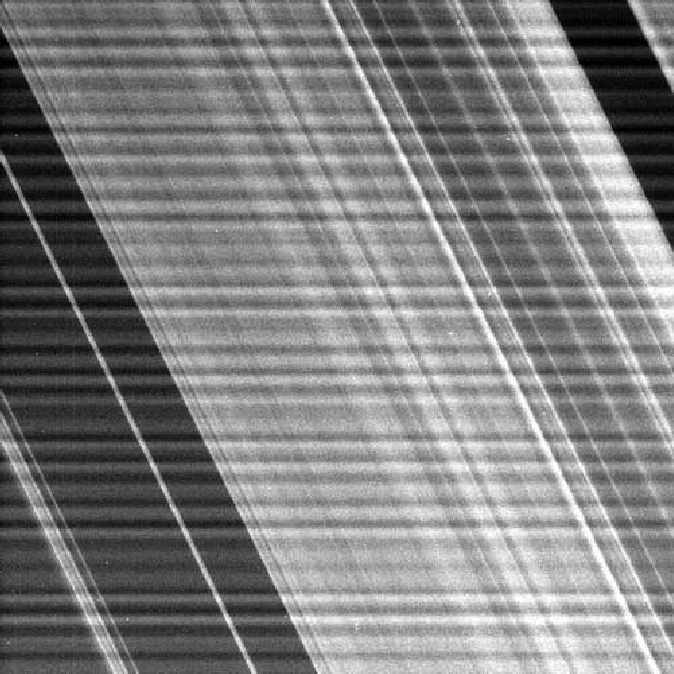

In [427]:
img = load("C:/Users/meies/Documents/Poli/EPs_Vitor/21_11/cassini-interference.tif")

In [428]:
pad = 5
img = dislocate_gray(img, pad)

684×684 Matrix{Float64}:
  0.6       -0.427451   0.427451  …  -0.588235   0.576471  -0.576471
 -0.6        0.427451  -0.427451      0.588235  -0.576471   0.576471
  0.545098  -0.454902   0.454902     -0.545098   0.509804  -0.509804
 -0.458824   0.443137  -0.443137      0.490196  -0.45098    0.45098
  0.4       -0.419608   0.419608     -0.478431   0.427451  -0.427451
 -0.4        0.419608  -0.419608  …   0.478431  -0.427451   0.427451
  0.4       -0.419608   0.419608     -0.478431   0.427451  -0.427451
 -0.458824   0.443137  -0.443137      0.490196  -0.45098    0.45098
  0.545098  -0.454902   0.454902     -0.545098   0.509804  -0.509804
 -0.6        0.427451  -0.427451      0.588235  -0.576471   0.576471
  ⋮                               ⋱                        
 -0.329412   0.32549   -0.32549   …   0.745098  -0.737255   0.737255
  0.32549   -0.329412   0.329412     -0.705882   0.701961  -0.701961
 -0.317647   0.313725  -0.313725      0.698039  -0.705882   0.705882
  0.317647  -0.31372

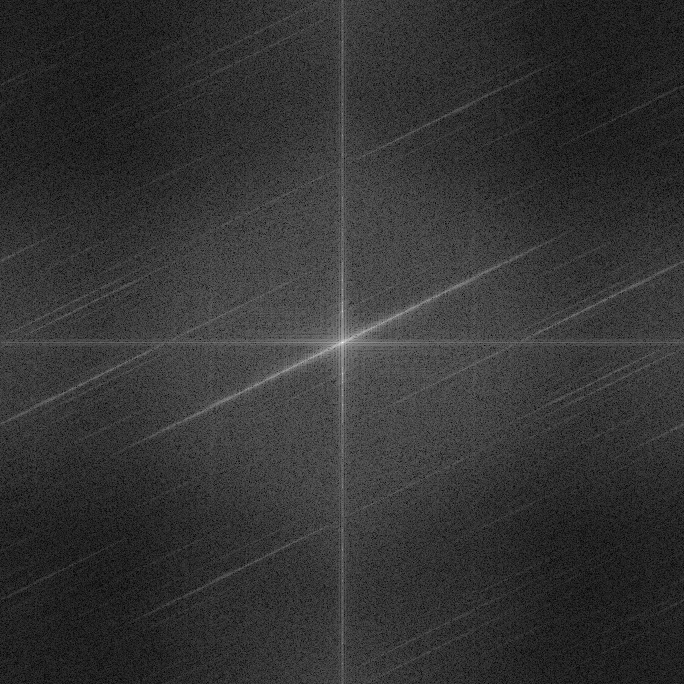

In [429]:
spec = fft(img)
Gray.(log.(abs.(spec) .+ 1) ./ maximum(log.(abs.(spec) .+1)))

Observando a imagem, podemos observar a presença de uma interferência na forma de faixas horizontais constituidas de pontos quase nulos. A partir disso, podemos inferir que, por ser uma interferência aproximadamente senoidal, a FFT mostraria a presença de frequências na direção vertical. Na imagem da FFT calculada, a região espectral correspondente à interferência é uma estreita faixa vertical que se estende do centro até as bordas inferior e superior da imagem.

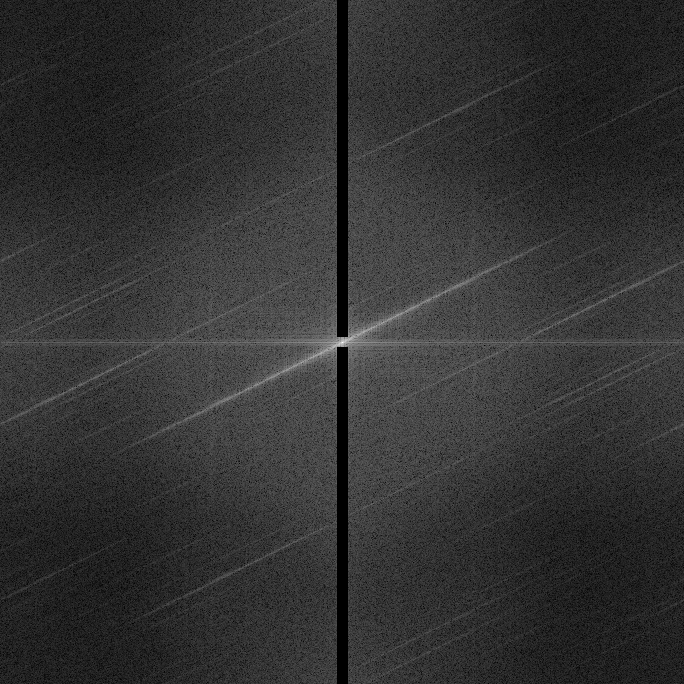

In [430]:
rows = size(img)[1]
cols = size(img)[2]

H_ideal = ones(rows, cols)
H_ideal[1:rows÷2-5, cols÷2-4:cols÷2+6] = zeros(rows÷2-5, 11)
H_ideal[rows÷2+6:end, cols÷2-4:cols÷2+6] = zeros(rows÷2-5, 11)

Gray.(log.(abs.(spec.*H_ideal) .+ 1) ./ maximum(log.(abs.(spec.*H_ideal) .+1)))

In [431]:
# Removendo pixeis adicionados pela expansão
spec = spec.*H_ideal
img_processed = ifft(spec)[pad+1:end-pad, pad+1:end-pad]
img_processed = dislocate_im(img_processed)

674×674 Matrix{ComplexF64}:
 0.246404+0.0121423im   0.244792+0.0123333im   …  0.469664+0.00885204im
 0.247288+0.0118007im   0.245828+0.011999im       0.468552+0.00845198im
 0.238337+0.0114341im    0.23696+0.0116394im      0.471135+0.0080341im
 0.257946+0.0110435im   0.256497+0.0112552im      0.476867+0.00759926im
 0.332305+0.0106296im   0.330602+0.0108472im      0.490908+0.00714841im
 0.332735+0.0101932im   0.331194+0.0104164im   …   0.48928+0.00668247im
 0.422143+0.00973534im  0.420276+0.00996365im     0.491463+0.00620244im
 0.455882+0.00925695im  0.453907+0.00948985im      0.48322+0.00570933im
 0.419042+0.00875904im  0.417317+0.00899604im     0.482744+0.00520417im
 0.418983+0.00824265im  0.417426+0.00848326im     0.480589+0.00468804im
         ⋮                                     ⋱  
 0.284344+0.0132913im   0.286141+0.0132889im   …  0.696571+0.012209im
 0.286752+0.013493im    0.288642+0.0135022im      0.697563+0.0122563im
 0.265004+0.0136662im   0.267185+0.0136869im      0.635034+0.

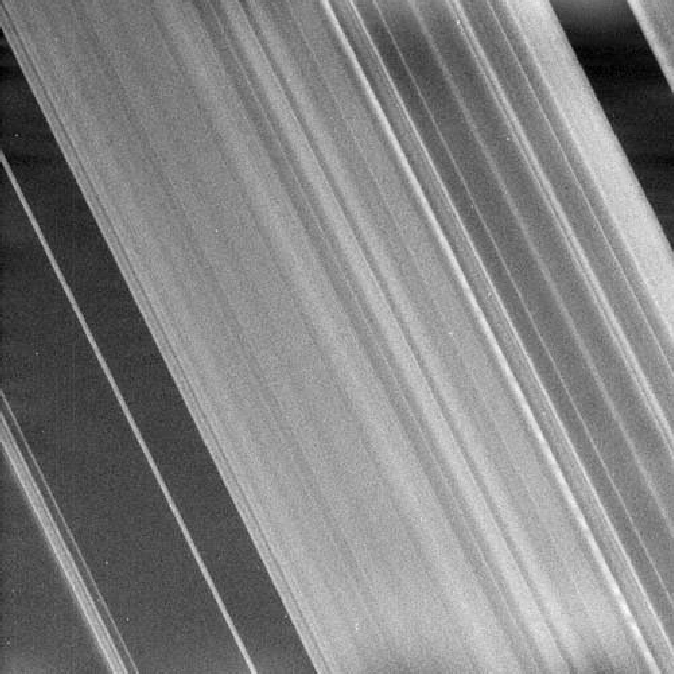

In [432]:
Gray.(log.(abs.(real.(img_processed)) .+ 1) ./ maximum(log.(abs.(real.(img_processed)) .+1)))

Pode-se perceber manchas nas bordas da imagem, eu tentei usar diferentes tipos e tamanhos de padding para concertar isso, mas acabei gerando muito ruido no resto da imagem então decidi manter a imagem sem nenhum padding